In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
instagram_api_folder = os.path.dirname(os.getcwd())

In [2]:
api_username = 'cuteanimalzzzz123'

In [3]:
user_table_filename = os.path.join(instagram_api_folder,'saved_info/%s_collected_user_info_table.csv'%api_username)
if os.path.isfile(user_table_filename):
    loaded_user_table = pd.read_csv(user_table_filename)
    loaded_user_table.set_index('user_id', inplace=True)
else:
    loaded_user_table = None

In [4]:
loaded_user_table

,username,private_status,follower_count,following_count,media_count,full_name,profile_pic_url,bio_text,url_in_bio,hashtag_following_count,usertags_count,api_request_time
user_id,,,,,,,,,,,,
4859643607,gladiatore_di_re_leone_gomorra,False,474,7161,1255,🦁👑🦁👑🦁👑🦁gomorra👑🦁👑🦁👑🦁,https://scontent-lax3-1.cdninstagram.com/v/t51...,NaN,NaN,3,4,1.640231e+09
8521096753,rechoya_noguchi,False,164,2115,13,Rechoya Noguchi,https://scontent-lax3-1.cdninstagram.com/v/t51...,•🇵🇭🇯🇵,NaN,20,2,1.640231e+09
35626739320,elipidiusiedward21,False,697,2793,1,elipidius edward,https://scontent-lax3-1.cdninstagram.com/v/t51...,NaN,NaN,11,1,1.640231e+09
44034990251,iampaula.21,False,77,227,5,ɪɪ Paula ɪɪ,https://scontent-lax3-1.cdninstagram.com/v/t51...,blessed ❤️,NaN,0,0,1.640231e+09
45380832733,zed.senpai2k21,False,275,1073,65,poro zed,https://scontent-lax3-1.cdninstagram.com/v/t51...,Zed my senpai🥰🥰\nPosting memes I found in my b...,NaN,0,8,1.640231e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
4120079014,jamieroberts6222,True,568,1943,87,Jamie Roberts,https://scontent-lax3-1.cdninstagram.com/v/t51...,Senior RHS class of 2022.,NaN,1,0,1.639391e+09
39612202963,carconnell_,False,419,582,0,Carley Elizabeth,https://scontent-lax3-2.cdninstagram.com/v/t51...,NaN,NaN,0,1,1.639391e+09
48740245931,jameshatesjameson,True,265,1578,26,James,https://scontent-lax3-2.cdninstagram.com/v/t51...,"spam, love following people.",NaN,0,0,1.639391e+09


In [5]:
def get_average_follower_count(user_table):
    average_follower_count = user_table['follower_count'].mean()
    return average_follower_count

get_average_follower_count(loaded_user_table)

505.9688195991091

In [6]:
def get_average_following_count(user_table):
    average_following_count = user_table['following_count'].mean()
    return average_following_count

get_average_following_count(loaded_user_table)

964.6555308092056

In [7]:
def get_follow_ratio(user_table):
    follow_ratio = user_table['following_count'].divide(loaded_user_table['follower_count']+1)
    follow_ratio_mean = follow_ratio.mean()
    return follow_ratio_mean

get_follow_ratio(loaded_user_table)

8.599099123834106

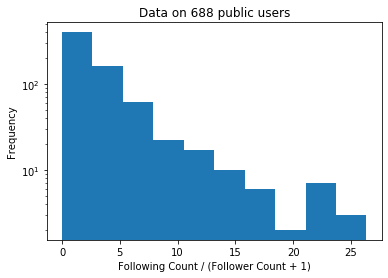

In [8]:
def get_follow_ratio_hist(user_table):
    user_table = user_table[user_table['private_status'] == False] #only plot public user histogram 
    follow_ratio = user_table['following_count'].divide(user_table['follower_count']+1)
    std_dev = follow_ratio.std()
    mean = follow_ratio.mean()
    outlier_limit = mean + 3*std_dev
    follow_ratio = follow_ratio[follow_ratio < outlier_limit]
    ax = follow_ratio.plot.hist()
    ax.set_yscale('log')
    ax.set_title('Data on %d public users'%len(follow_ratio))
    ax.set_xlabel('Following Count / (Follower Count + 1)')
    plt.show()
    
get_follow_ratio_hist(loaded_user_table)

In [9]:
def get_sorted_follow_ratio_names(user_table):
    user_table = user_table.set_index('username')
    follow_ratio_column = user_table['following_count'].divide(user_table['follower_count']+1)
    sorted_follow_ratio = follow_ratio_column.sort_values(ascending=False)
    return sorted_follow_ratio
    
get_sorted_follow_ratio_names(loaded_user_table)

username
check_mycash           1587.000000
sensorytheory          1250.000000
eishockey_omaopa_14    1248.500000
quinomii                834.000000
panggyanin              327.000000
                          ...     
santehmsk777              0.139764
_.alice.__                0.122762
alisaaa.rgb               0.110306
shalina.rgb               0.059672
kiri.li                   0.003411
Length: 1347, dtype: float64

In [10]:
"""
Here we calculate an interaction score between 0 (will not interact with us) and 1 (will interact with us).
We want a user is active, so posts a lot (media_score) and somebody worthy of following (follower_score) 
and tends to follow more users than follow them (confidence_lower_bound)
"""
def get_media_score(user_table):
    """
    Returns a value between 0 (no posts) and 1 (infinite posts)
    """
    media_count = user_table['media_count'].copy()
    media_score = (2/np.pi)*np.arctan(media_count)
    return media_score

def get_follower_score(user_table):
    """
    Returns a value between 0 (no followers) and 1 (infinite followers)
    """
    follower_count = user_table['follower_count']
    follower_score = (2/np.pi)*np.arctan(follower_count/100)
    return follower_score
    
def get_confidence_lower_bound(user_table):
    """
    We model the probability p = num_following / (num_following + num_followers) with a binomial distribution
    and obtain the lower bound for a 95% confidence interval.
    """
    following_count = user_table['following_count']
    follower_count = user_table['follower_count']
    total_follow_count = following_count+follower_count
    p_hat = following_count / total_follow_count
    std_dev_hat = np.sqrt((p_hat * (1-p_hat)) / total_follow_count)
    z_score = 1.96 #for 95% confidence interval
    confidence_lower_bound = p_hat - z_score*std_dev_hat
    
    #make sure confidence interval bound is inside of [0,1]
    confidence_lower_bound.loc[confidence_lower_bound < 0] = 0
    confidence_lower_bound.loc[confidence_lower_bound > 1] = 1
    
    return confidence_lower_bound

def get_interaction_score(user_table):
    media_score = get_media_score(user_table)
    follower_score = get_follower_score(user_table)
    confidence_lower_bound = get_confidence_lower_bound(user_table)
    interaction_score = (media_score+follower_score+confidence_lower_bound)/3
    return interaction_score
    
def rank_for_interactions(user_table):
    user_table = user_table[user_table['private_status'] == False].copy() #only interact with public
    user_table['interaction_score'] = get_interaction_score(user_table)
    user_table.sort_values('interaction_score', ascending=False, inplace=True)
    return user_table

In [11]:
rank_for_interactions(loaded_user_table)

,username,private_status,follower_count,following_count,media_count,full_name,profile_pic_url,bio_text,url_in_bio,hashtag_following_count,usertags_count,api_request_time,interaction_score
user_id,,,,,,,,,,,,,
4859643607,gladiatore_di_re_leone_gomorra,False,474,7161,1255,🦁👑🦁👑🦁👑🦁gomorra👑🦁👑🦁👑🦁,https://scontent-lax3-1.cdninstagram.com/v/t51...,NaN,NaN,3,4,1.640231e+09,0.933210
3079269626,polina_malina3913,False,974,6693,212,Полина,https://scontent-lax3-2.cdninstagram.com/v/t51...,Позитивная и активная с чувством юмора 😂🥰😃🎼💍👑,NaN,112,130,1.640215e+09,0.932457
19382965649,bs60316912019,False,677,7495,28,Rai Saab,https://scontent-lax3-1.cdninstagram.com/v/t51...,NaN,NaN,15,1,1.640231e+09,0.931698
43022528336,rianabdullaev,False,1237,7145,181,риан абдуллаев,https://scontent-lax3-2.cdninstagram.com/v/t51...,"Посмотри на себя кто ты и каким был раньше, пр...",NaN,11,0,1.640230e+09,0.929986
15121874247,cafe_bar_sevgilim,False,1606,7500,238,КАФЕ СЕВГИЛИМ,https://scontent-lax3-2.cdninstagram.com/v/t51...,ЖДЕМ ВСЕХ КАФЕ БАР СЕВГИЛИМЕ УЛИЦА КРАСНОЯБОГА...,NaN,57,7,1.640168e+09,0.924514
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48277221523,jasmin.x.2004,False,19,14,0,NaN,https://scontent-lax3-2.cdninstagram.com/v/t51...,NaN,NaN,0,0,1.640201e+09,0.125050
9896191186,samipesho,False,30,11,0,NaN,https://scontent-lax3-1.cdninstagram.com/v/t51...,NaN,NaN,0,2,1.640212e+09,0.106072
4774586061,treixlerm,False,2,4,0,maximilian,https://scontent-sjc3-1.cdninstagram.com/v/t51...,NaN,NaN,0,0,1.640201e+09,0.100732
